Plot saved as 'Chapter1-virtual-and-real-reserves.pdf' (ready for LaTeX)


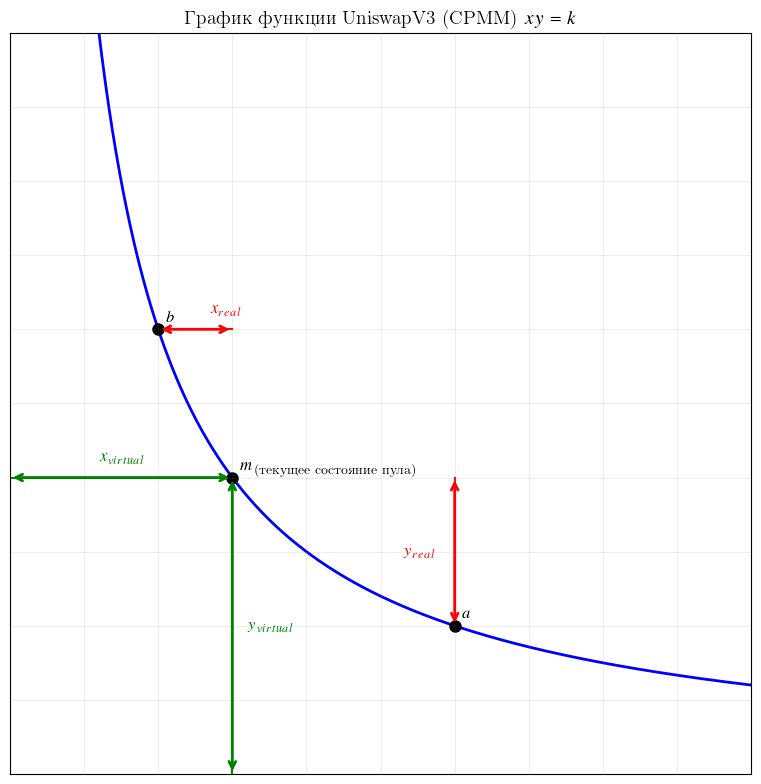

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Configure LaTeX with required packages
rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=12)

# Add your complete LaTeX preamble
rc('text.latex', preamble=r'''
    \usepackage{amsmath}
    \usepackage{amssymb}
    \usepackage[T2A]{fontenc}
    \usepackage[utf8]{inputenc}
    \usepackage[english,russian]{babel}
    \usepackage{cmap} % Для правильного поиска в PDF
    \usepackage{newtxtext,newtxmath} % Шрифты Times New Roman
''')

# Set the parameter k
k = 12

# Define the hyperbola function x*y = k => y = k/x
def hyperbola(x):
    return k / x

# Define the points
a = (k/2, 2)      # [k/2; 2]
b = (k/6, 6)      # [k/6; 6]
m = (k/4, 4)      # [k/4; 4]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate x values for the hyperbola (avoid x=0)
x_hyperbola = np.linspace(0.5, 10, 400)
y_hyperbola = hyperbola(x_hyperbola)

# Plot the hyperbola
ax.plot(x_hyperbola, y_hyperbola, 'b-', linewidth=2, label=r'График функции UniswapV3 (CPMM) $xy = k$')

# Plot the lines with arrows
# 1. x_real - horizontal from [k/6; 6] to [k/4; 6] - RED (solid line)
x_real_x = [b[0], m[0]]
x_real_y = [6, 6]
ax.annotate('', xy=(m[0], 6), xytext=(b[0], 6),
            arrowprops=dict(arrowstyle='<->', color='red', linewidth=2))
# Draw the actual line segment
ax.plot([b[0], m[0]], [6, 6], 'r-', linewidth=1.5)
# Label for x_real with LaTeX
x_real_mid_x = (b[0] + m[0]) / 2
ax.text(x_real_mid_x + 0.4, 6.2, r'$x_{real}$', color='red', fontsize=12, 
        fontweight='bold', ha='center')

# 2. y_real - vertical from [k/2; 2] to [k/2; 4] - RED (solid line)
y_real_x = [a[0], a[0]]
y_real_y = [2, 4]
ax.annotate('', xy=(a[0], 4), xytext=(a[0], 2),
            arrowprops=dict(arrowstyle='<->', color='red', linewidth=2))
# Draw the actual line segment
ax.plot([a[0], a[0]], [2, 4], 'r-', linewidth=1.5)
# Label for y_real with LaTeX - ГОРИЗОНТАЛЬНО
y_real_mid_y = (2 + 4) / 2
ax.text(a[0] - 0.3, y_real_mid_y, r'$y_{real}$', color='red', fontsize=12, 
        fontweight='bold', ha='right', va='center')

# 3. x_virtual - horizontal from [0; 4] to [k/4; 4] - GREEN (solid line)
x_virtual_x = [0, m[0]]
x_virtual_y = [4, 4]
ax.annotate('', xy=(m[0], 4), xytext=(0, 4),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=2))
# Draw the actual line segment
ax.plot([0, m[0]], [4, 4], 'g-', linewidth=1.5)
# Label for x_virtual with LaTeX
x_virtual_mid_x = m[0] / 2
ax.text(x_virtual_mid_x, 4.2, r'$x_{virtual}$', color='green', fontsize=12, 
        fontweight='bold', ha='center')

# Добавить текст "Текущее состояние пула" справа от точки m
ax.text(m[0] + 0.3, m[1] + 0.1, "(текущее состояние пула)", 
        color='black', fontsize=10, ha='left', va='center')

# 4. y_virtual - vertical from [k/4; 0] to [k/4; 4] - GREEN (solid line)
y_virtual_x = [m[0], m[0]]
y_virtual_y = [0, 4]
ax.annotate('', xy=(m[0], 4), xytext=(m[0], 0),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=2))
# Draw the actual line segment
ax.plot([m[0], m[0]], [0, 4], 'g-', linewidth=1.5)
# Label for y_virtual with LaTeX - ГОРИЗОНТАЛЬНО
y_virtual_mid_y = (0 + 4) / 2
ax.text(m[0] + 0.2, y_virtual_mid_y, r'$y_{virtual}$', color='green', fontsize=12, 
        fontweight='bold', ha='left', va='center')

# Plot the points with labels (all in black)
points = {'a': a, 'b': b, 'm': m}

for label, point in points.items():
    ax.plot(point[0], point[1], 'o', color='black', markersize=8)
    # Можно использовать LaTeX и для меток точек
    ax.text(point[0] + 0.1, point[1] + 0.1, f'${label}$', fontsize=12, 
            fontweight='bold', color='black')
    
# Set plot limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Устанавливаем сетку с произвольными линиями (без привязки к меткам)
# Добавляем горизонтальные линии
for y in np.arange(0, 11, 1):
    ax.axhline(y=y, color='gray', linestyle='-', alpha=0.2, linewidth=0.5)
    
# Добавляем вертикальные линии
for x in np.arange(0, 11, 1):
    ax.axvline(x=x, color='gray', linestyle='-', alpha=0.2, linewidth=0.5)

# Убираем все метки (ticks) с осей
ax.set_xticks([])
ax.set_yticks([])

# Убираем подписи осей
ax.set_xlabel('')
ax.set_ylabel('')

# Set title with LaTeX
ax.set_title(r'График функции UniswapV3 (CPMM) $xy = k$', fontsize=14, fontweight='bold')

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

plt.savefig('../latex/images/Chapter1-virtual-and-real-reserves.pdf', 
            format='pdf', 
            bbox_inches='tight',
            pad_inches=0,
            dpi=300)

print("Plot saved as 'Chapter1-virtual-and-real-reserves.pdf' (ready for LaTeX)")
plt.tight_layout()
plt.show()